<a href="https://colab.research.google.com/github/ShhreyashPandey/NLP/blob/main/NLP_Assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shhreyash Pandey

22070126105

AIML-B2

# AG News Classification Dataset  

# Pre-processing and Training

Preprocessing the dataset to get cleaned version of it and then saving it to reduce the computation load on every run.

Training various models like Logistic Regression, SVM(Support Vector Machine) and Random Forest on the preprocessed dataset to get the best possbile accuracy.

In [ ]:
# Importing important libraries
import pandas as pd
import numpy as np
import re
import spacy
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [ ]:
# Load the SpaCy model for English
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Load the datasets(train and test)
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:
train.shape

(120000, 3)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [ ]:
train.describe()

,Class Index
count,120000.000000
mean,2.500000
std,1.118039
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000


In [ ]:
test.shape

(7600, 3)

In [ ]:
# Function to perform pre-processing
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove symbols and punctuation
    text = re.sub(r'\W', ' ', text)

    # Tokenization and Lemmatization
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]

    # Join tokens back to a single string
    return ' '.join(tokens)

In [ ]:
# Applying on training set
train['cleaned_description'] = train['Description'].apply(preprocess_text)

In [ ]:
# Applying on testing set
test['cleaned_description'] = test['Description'].apply(preprocess_text)

In [ ]:
# Save the processed data to CSV files
train.to_csv('processed_train.csv', index=False)
test.to_csv('processed_test.csv', index=False)

print("Processed data saved successfully!")

Processed data saved successfully!


In [ ]:
# Load the preprocessed datasets
train = pd.read_csv('/content/processed_train.csv')
test = pd.read_csv('/content/processed_test.csv')

In [ ]:
# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(train['cleaned_description'], train['Class Index'], test_size=0.2, random_state=42)

In [ ]:
# Vectorizing Data using CountVectorizer and TFIDFVectorizer
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
X_train_count = count_vectorizer.fit_transform(X_train)
X_val_count = count_vectorizer.transform(X_val)

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

Logistic Regression with CountVectorizer
              precision    recall  f1-score   support

           1       0.90      0.89      0.89      5956
           2       0.95      0.96      0.96      6058
           3       0.86      0.87      0.87      5911
           4       0.88      0.87      0.87      6075

    accuracy                           0.90     24000
   macro avg       0.90      0.90      0.90     24000
weighted avg       0.90      0.90      0.90     24000



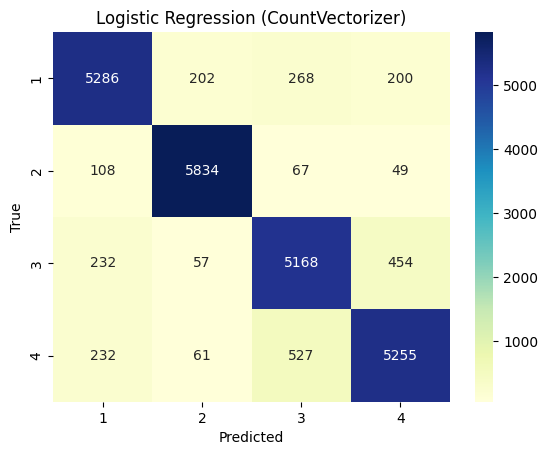

In [ ]:
# Logistic Regression with CountVectorizer
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_count, y_train)
y_pred_lr_count = lr.predict(X_val_count)
print("Logistic Regression with CountVectorizer")
print(classification_report(y_val, y_pred_lr_count)) #classification report
cm = confusion_matrix(y_val, y_pred_lr_count) #confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.title("Logistic Regression (CountVectorizer)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Logistic Regression with TFIDFVectorizer
              precision    recall  f1-score   support

           1       0.92      0.89      0.91      5956
           2       0.95      0.97      0.96      6058
           3       0.87      0.87      0.87      5911
           4       0.88      0.88      0.88      6075

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



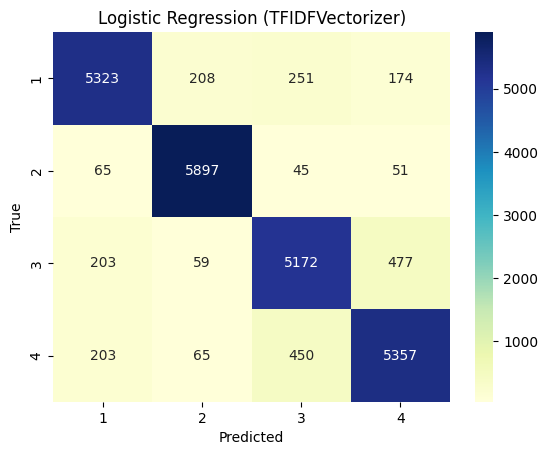

In [ ]:
# Logistic Regression with TFIDFVectorizer
lr.fit(X_train_tfidf, y_train)
y_pred_lr_tfidf = lr.predict(X_val_tfidf)
print("Logistic Regression with TFIDFVectorizer")
print(classification_report(y_val, y_pred_lr_tfidf)) #classification report
cm = confusion_matrix(y_val, y_pred_lr_tfidf) #confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.title("Logistic Regression (TFIDFVectorizer)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


SVC with CountVectorizer
              precision    recall  f1-score   support

           1       0.93      0.90      0.91      5956
           2       0.95      0.97      0.96      6058
           3       0.88      0.88      0.88      5911
           4       0.88      0.89      0.89      6075

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



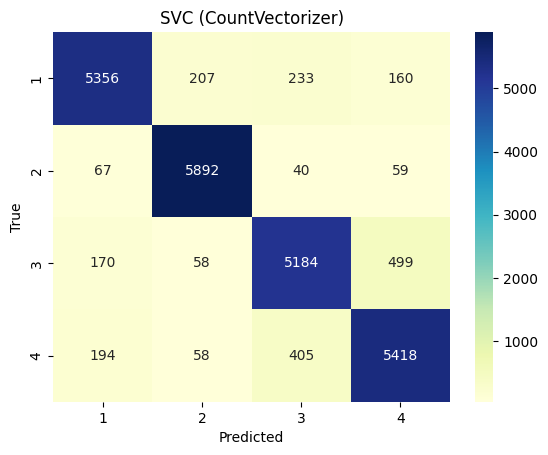

In [ ]:
# SVC with CountVectorizer
svc = SVC()
svc.fit(X_train_count, y_train)
y_pred_svc_count = svc.predict(X_val_count)
print("SVC with CountVectorizer")
print(classification_report(y_val, y_pred_svc_count)) #classification report
cm = confusion_matrix(y_val, y_pred_svc_count) #confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=svc.classes_, yticklabels=svc.classes_)
plt.title("SVC (CountVectorizer)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

SVC with TFIDFVectorizer
              precision    recall  f1-score   support

           1       0.93      0.90      0.91      5956
           2       0.95      0.98      0.96      6058
           3       0.88      0.89      0.88      5911
           4       0.89      0.89      0.89      6075

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



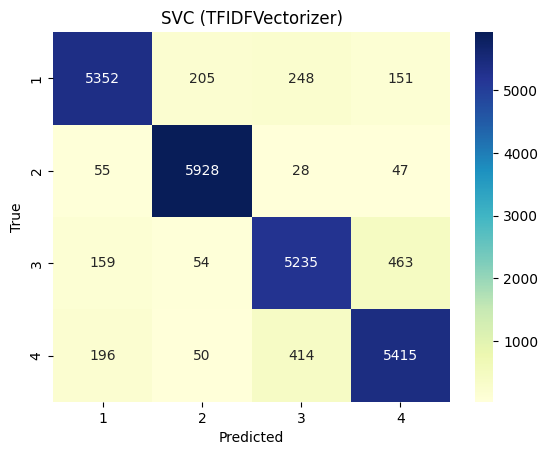

In [ ]:
# SVC with TFIDFVectorizer
svc = SVC()
svc.fit(X_train_tfidf, y_train)
y_pred_svc_tfidf = svc.predict(X_val_tfidf)
print("SVC with TFIDFVectorizer")
print(classification_report(y_val, y_pred_svc_tfidf)) #classification report
cm = confusion_matrix(y_val, y_pred_svc_tfidf) #confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=svc.classes_, yticklabels=svc.classes_)
plt.title("SVC (TFIDFVectorizer)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Random Forest with CountVectorizer
              precision    recall  f1-score   support

           1       0.90      0.89      0.89      5956
           2       0.91      0.97      0.94      6058
           3       0.86      0.85      0.86      5911
           4       0.88      0.84      0.86      6075

    accuracy                           0.89     24000
   macro avg       0.89      0.89      0.89     24000
weighted avg       0.89      0.89      0.89     24000



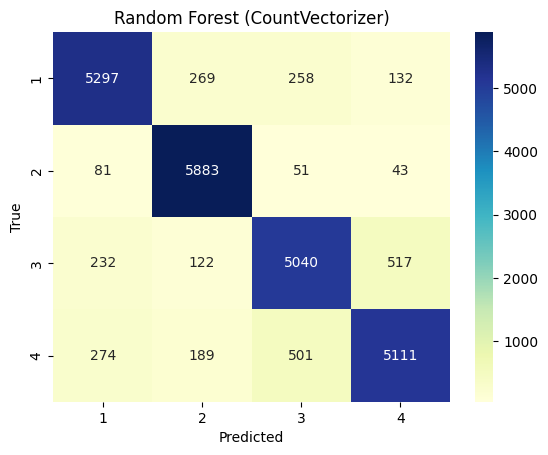

In [ ]:
# Random Forest with CountVectorizer
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_count, y_train)
y_pred_rf_count = rf.predict(X_val_count)
print("Random Forest with CountVectorizer")
print(classification_report(y_val, y_pred_rf_count)) #classification report
cm = confusion_matrix(y_val, y_pred_rf_count) #confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Random Forest (CountVectorizer)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Random Forest with TFIDFVectorizer
              precision    recall  f1-score   support

           1       0.90      0.89      0.89      5956
           2       0.91      0.97      0.94      6058
           3       0.85      0.85      0.85      5911
           4       0.88      0.84      0.86      6075

    accuracy                           0.89     24000
   macro avg       0.89      0.89      0.88     24000
weighted avg       0.89      0.89      0.89     24000



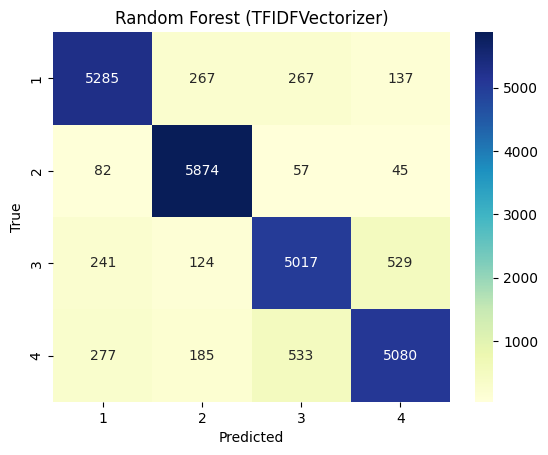

In [ ]:
# Random Forest with TFIDFVectorizer
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_tfidf, y_train)
y_pred_rf_tfidf = rf.predict(X_val_tfidf)
print("Random Forest with TFIDFVectorizer")
print(classification_report(y_val, y_pred_rf_tfidf)) #classification report
cm = confusion_matrix(y_val, y_pred_rf_tfidf) #confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Random Forest (TFIDFVectorizer)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Testing

 Using "Description" column predict the "Class" column where
 1. World
 2. Sports
 3. Business
 4. Sci/Tech

Since SVC with TFIDFVectorizer gives the best accuracy of 91% along with good precision for each class too, we will apply that on the test set.

In [ ]:
# Vectorizing the test data using the TFIDFVectorizer
X_test_tfidf = tfidf_vectorizer.transform(test['cleaned_description'])

In [ ]:
# Predicting the Class for the test set using the trained SVC model
test['Predicted_Class'] = svc.predict(X_test_tfidf)

In [ ]:
# Save the predictions to a new CSV file
test.to_csv('/content/test_with_predictions.csv', index=False)
print("Predictions saved successfully!")

Predictions saved successfully!


In [7]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [8]:
!pip install pypandoc

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!jupyter nbconvert --to PDF "drive/My Drive/Colab Notebooks/NLP_Assign1.ipynb"

[NbConvertApp] Converting notebook drive/My Drive/Colab Notebooks/NLP_Assign1.ipynb to PDF
[NbConvertApp] Support files will be in NLP_Assign1_files/
[NbConvertApp] Making directory ./NLP_Assign1_files
[NbConvertApp] Making directory ./NLP_Assign1_files
[NbConvertApp] Making directory ./NLP_Assign1_files
[NbConvertApp] Making directory ./NLP_Assign1_files
[NbConvertApp] Making directory ./NLP_Assign1_files
[NbConvertApp] Making directory ./NLP_Assign1_files
[NbConvertApp] Writing 78689 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 213628 bytes to drive/My Drive/Colab Notebooks/NLP_Assign1.pdf
